## 로지스틱 회귀(Logistic Regression) - 심화

선형회귀(Linear Regression) 경우,<br>
공부한 시간(2,3,6,9,11시간)과 기말고사 성적(60,65,70,80,90점)과의 관계를 학습한 결과로<br>
새로운 데이타(13시간)가 들어왔을때 성적을 예측하는 모델로 사용됩니다.<br>

반면에 로지스틱회귀(Rogistic Regression) 경우,<br>
Classification(분류) 문제를 다루는 모델입니다.<br>
맞다 / 틀리다, 살았다 /죽었다, 암이다 / 암이 아니다 ...경우처럼<br>
Target의 카테고리가 2개인 이진 분류에서 주로 사용되는 회귀 모델입니다.<br>

즉, Linear Regression은 연속적인 숫자 선상에 있는 값을 예측할때 사용하는 모델이고<br>
Rogistic Regression은 둘중 하나르 선택할 때 사용하는 모델이라 할 수 있습니다.

### Configuration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generate Datasets
로지스틱 회귀를 가장 잘 이해할 수 있는 데이타셋을 예시로 들어보겠습니다.<br>
Feature 생성 - salaries, satisfactions<br>

S전자 신입사원 10명의 (2년후) 연봉 정보를 가져옵니다.<br>
이를 salaries라는 변수에 할당한 후, 행렬 연산을 편하게 하기 위해 Numpy의 배열로 변경해줍니다.<br>
단 여기서 편의를 위해서 단위는 1,000만원으로 하겠습니다.(가령 5.0이면 연봉 5천만원)

#### salaries

In [2]:
salaries = [5.0, 5.5, 5.3, 6.2, 5.25, 5.2, 5.5, 4.9, 5.35, 5.25]
salaries = np.array(salaries)

salaries

array([5.  , 5.5 , 5.3 , 6.2 , 5.25, 5.2 , 5.5 , 4.9 , 5.35, 5.25])

#### satisfactions

S전자 신입사원 10명의 업무 만족도 정보를 가져옵니다.<br>
점수는 1점부터 10점으로 구성되어 있습니다. <br>
이를 satisfactions 라는 변수에 할당한 뒤, 행렬 연산을 편하게 하기 위해서 역시 Numpy의 array() 함수를 사용하겠습니다.

In [5]:
satisfactions = [3, 7, 4, 9, 8, 6, 5, 4, 6, 7]
satisfactions = np.array(satisfactions)

satisfactions

array([3, 7, 4, 9, 8, 6, 5, 4, 6, 7])

#### Label생성  -   stay

위에서 2개의 feature를 만들었습니다.<br>
그리고 위 신입사원들의 이직 여부(회사 잔류여부)를 표현한 데이타를 생성합니다.<br>
이 데이타가 오늘 다룰 머신러닝 알고리즘의 Label이 될 것입니다.<br>

S전자 신입사원 10명의 이직 여부(회사 잔류여부)를 저장합니다.<br>
이직하지 않고 회사에 남아있는 경우 True 값을 넣으며, 반대로 다른 회사로 이직했을 경우 False라는 값을 넣습니다.<br>
이 값들을 stay라는 변수에 할당한 후<br>
역시 행렬연산을 위해서 Numpy의 array()를 사용합니다.

In [6]:
stay = [False, True, False, True, True, True, True, False, True, True]
stay = np.array(stay)

stay

array([False,  True, False,  True,  True,  True,  True, False,  True,
        True])

### Visualize - DataFrame

앞서 생성한 데이타를 하나로 묶어서 표(Table) 로 표현합니다.<br>
그리고 기 결과를 example 이라는 변수에 할당합니다.

In [9]:
example = pd.DataFrame({'연봉' : salaries, '업무만족도' : satisfactions, '잔류' : stay})
example

,연봉,업무만족도,잔류
0,5.00,3,False
1,5.50,7,True
2,5.30,4,False
3,6.20,9,True
4,5.25,8,True
5,5.20,6,True
6,5.50,5,True
7,4.90,4,False
8,5.35,6,True
9,5.25,7,True


### Visualize - Matplotlib

주어진 데이타를 바탕으로 연봉과 업무만족도가 이직에 얼마나 영향을 미치는지 시각화 할수 있습니다.<br>
보라색은 퇴직한 사람.<br>
c는 Color로 이직여부로 구분을 했습니다.<br>

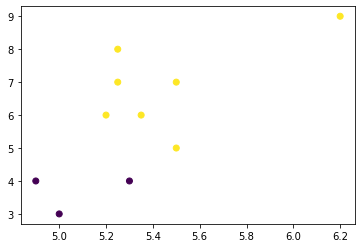

In [11]:
plt.scatter(salaries, satisfactions, c=stay)
plt.show()

### Define Sigmoid


RogisticRegression 모델에는 Sigmoid 함수를 사용합니다.<br>


이제 로지스틱 회귀(Logistic Regression)를 돌리기 위해 필요한 기능을 구현하겠습니다. 먼저 스쿼싱 함수(Squashing Function)로 사용할 시그모이드(Sigmpod)를 직접 구현해 보겠습니다. 시그모이드 함수의 공식은 다음과 같습니다.

$$\text{sigmoid(x)}  = \frac{1}{1+ e^{-x}} $$

이 공식을 그래프로 시각화 하면 다음과 같이 나올 것입니다.
![pic.jpg](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

이제 위에서 설명한 내용을 바탕으로 시그모이드 함수를 직접 구현해보겠습니다. 시그모이드 함수를 구현하기 위해서는 넘파이(Numpy)에서 지수 함수(exponential fucntion)를 계산하는 ```np.exp```를 사용해야 합니다.

In [12]:
def sigmoid(x) :
    return 1 / (1+np.exp(-x))

In [13]:
sigmoid(0)

0.5

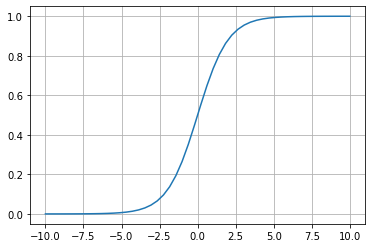

In [17]:
# 균일한 간격을 가지는 1차원 배열 생성
xx = np.linspace(-10, 10)
yy = sigmoid(xx)

plt.plot(xx,yy)
plt.grid()
plt.show()

### Gradient Descent - 경사하강법

이제 본격적으로 로지스틱 회귀 알고리즘을 학습시켜 보겠습니다. <br>
먼저 앞서 생성한 두개의 Feature(salaries, satisfactions)를 편의상 각각 x1, x2 라는 변수에 할당합니다.

$
H(x) = w_1x_1 + w_2x_2 + b
$

In [18]:
x1 = salaries
x2 = satisfactions

x1, x2

(array([5.  , 5.5 , 5.3 , 6.2 , 5.25, 5.2 , 5.5 , 4.9 , 5.35, 5.25]),
 array([3, 7, 4, 9, 8, 6, 5, 4, 6, 7]))

회사의 잔류 여부를 나타내는 stay를 Label로 간주하고 y변수에 할당

In [19]:
y = stay
y

array([False,  True, False,  True,  True,  True,  True, False,  True,
        True])

이제 본격적으로 학습을 시작해봅시다. <br>
두 개의 변수 x1과 x2를 가지고 있으니 총 세 개의 값 <br>
바로 가중치(weight) w1, w2과, bias인 b를 학습해야 합니다.<br>
세 개를 변수로 정의한 뒤, 경사 하강법(Gradient Descent)을 이용해 로지스틱 회귀를 학습시켜줍니다.<br>

학습은 모든 epoch이 끝날 때까지 반복할 수도 있지만, <br>
여기서는 굳이 그럴 필요없이 정확도(accuracy)가 1.0에 도달하면 학습을 종료하도록 하겠습니다.<br>

In [33]:
num_epoch = 100
learning_rate = 1.0

w1 = np.random.uniform(-1, 1)
w2 = np.random.uniform(-1, 1)
b = np.random.uniform(-1, 1)
for epoch in range(num_epoch) :
    y_predict = w1*x1+w2*x2+b
    
    y_predict = sigmoid(y_predict)
    
    predict = y_predict > 0.5
#         predict = 1 # 임계값이 해당 값을 넘어가면 1로 보자
        
    accuracy = (predict == y).mean()
    
    print('### Accuracy : ',accuracy)
    
    if epoch % 10 == 0 :
        print(f'{epoch}, accuracy : {accudlrracy:.4f}')
    
    if accuracy == 1.0 :
        break
        
    w1 = w1 - learning_rate*((y_predict - y) * x1).mean()
    w2 = w2 - learning_rate*((y_predict - y) * x2).mean()
    b = b - learning_rate*(y_predict - y).mean()
    
print(y_predict)

### Accuracy :  0.8
0, accuracy : 0.8000
### Accuracy :  0.7
### Accuracy :  0.7
### Accuracy :  1.0
[0.19548961 0.9562132  0.39366401 0.99309238 0.98914384 0.89098659
 0.6529166  0.47307263 0.87860785 0.96395322]


### Predict - 결과 예측하기

로지스틱 회귀의 학습이 끝났으면,<br>
이 머신러닝 알고리즘을 활용하여 원하는 결과를 예측할 수 있습니다.<br>
앞선 데이터를 그대로 활용하여,<br>
S전자의 신입 데이터 사이언티스트들이 2년 후에 이직할 것인지 여부를 예측해 보도록 하겠습니다.<br>

In [26]:
pred = w1*x1 + w2*x2 + b
pred

array([-5.46005859, 12.56088742, -1.65594219, 19.76848016, 18.56852415,
        8.75677102,  2.54881426, -0.05338196,  8.15581093, 13.56248757])

In [28]:
pred = sigmoid(pred)
predict = y_predict>0.5

In [32]:
result = example.copy()
result['잔류(예측)'] = predict
result['잔류(확률)'] = pred
result

,연봉,업무만족도,잔류,잔류(예측),잔류(확률)
0,5.00,3,False,False,0.004235
1,5.50,7,True,True,0.999996
2,5.30,4,False,False,0.160307
3,6.20,9,True,True,1.000000
4,5.25,8,True,True,1.000000
5,5.20,6,True,True,0.999843
6,5.50,5,True,True,0.927494
7,4.90,4,False,False,0.486658
8,5.35,6,True,True,0.999713
9,5.25,7,True,True,0.999999
